In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random
from skimage import io
import scipy.io as sio
import copy
import random
cv.__version__

'3.4.2'

### Bad approach

In [466]:
# prepare data
all_frame_1 = []
for i in range(22, 201):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '0' + name
    pic = cv.imread("./project1/clip_1/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_1.append(RGB_img)

In [277]:
def picture_comp_gray(all_frame, iteration = 20, threshold = 2):
    result = np.ones(all_frame[0].shape[0:2], dtype=bool)
    while iteration > 0:
        rand = random.sample(range(len(all_frame)), 2)
        a = cv.cvtColor(all_frame_1[rand[0]], cv.COLOR_BGR2GRAY) 
        b = cv.cvtColor(all_frame_1[rand[1]], cv.COLOR_BGR2GRAY) 
        diff = np.absolute(a - b) < threshold
        result = np.logical_and(result, diff)
        iteration -= 1
    return np.transpose(result.nonzero()) 

In [233]:
def picture_comp(all_frame, iteration = 20, threshold = 2):
    result = np.ones(all_frame[0].shape[0:2], dtype=bool)
    while iteration > 0:
        rand = random.sample(range(len(all_frame)), 2)
        a = all_frame_1[rand[0]]
        b = all_frame_1[rand[1]]
        diff = np.absolute(a - b) < threshold
        result = np.logical_and(result, diff[:,:,0])
        result = np.logical_and(result, diff[:,:,1])
        result = np.logical_and(result, diff[:,:,2])
        iteration -= 1
    return np.transpose(result.nonzero())   

In [276]:
pt = picture_comp(all_frame_1,iteration=10,threshold=5)
pt

array([], shape=(0, 2), dtype=int64)

In [298]:
pt = picture_comp_gray(all_frame_1,iteration=10,threshold=5)
pt

array([[182, 100]])

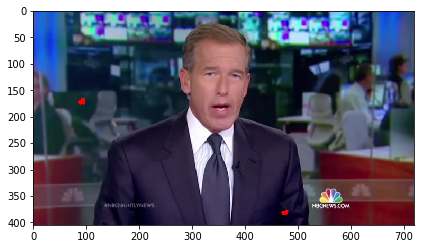

In [297]:
img1 = all_frame_1[0]
for p in pt:
    img1  = cv.circle(img1, (p[1],p[0]), 3, (255,0,0), -1) 
io.imshow(img1)

### Feature point with location infomation approach

In [486]:
def feature_comp(all_frame, iteration=10,threshold=10):
    sift = cv.xfeatures2d.SIFT_create()
    bf = cv.BFMatcher()
    result = []
    while iteration > 0:
        rand = random.sample(range(len(all_frame)), 2)
        a =  all_frame[rand[0]]
        b =  all_frame[rand[1]]
        # find the keypoints and descriptors with SIFT
        kp_1, des_1 = sift.detectAndCompute(a,None)
        kp_2, des_2 = sift.detectAndCompute(b,None)
        matches = bf.knnMatch(des_1,des_2, k=2)

        # Apply ratio test
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append(m)
        # find matching points that in same or close place
        same_position = []
        for match in good:
            match_1 = kp_1[match.queryIdx]
            match_2 = kp_2[match.trainIdx]
            if np.allclose(np.array(match_1.pt, dtype = np.int32), np.array(match_2.pt, dtype = np.int32), atol=threshold):
                find_match = np.array(match_1.pt, dtype= np.int32)
                if result == []:
                    same_position.append(find_match)
                else:
                    for prev_find in result:
                        if np.allclose(prev_find, find_match, atol=threshold):
                            same_position.append(prev_find)
                            same_position.append(find_match)
                            break
        # remove duplicate points
        result = same_position
        if len(result) > 0:
            result = np.unique(np.array(same_position), axis=0)
        iteration -= 1
        
    return result       

/home/yige/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


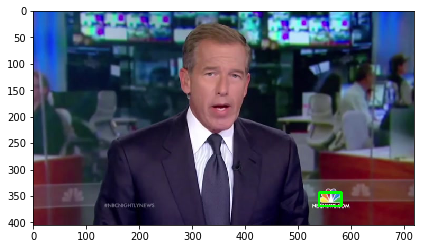

In [490]:
# clip1
all_frame_1 = []
for i in range(22, 201):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '0' + name
    pic = cv.imread("./project1/clip_1/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_1.append(RGB_img)
img1 = all_frame_1[0]
pts = feature_comp(all_frame_1, iteration = 5)
pts = np.array(pts)
x_max, x_min = pts[:,0].max(), pts[:,0].min()
y_max, y_min = pts[:,1].max(), pts[:,1].min()

img1  = cv.rectangle(img1, (x_min,y_min),(x_max,y_max),(0,255,0),3)
# for p in pts:
#     img1  = cv.circle(img1, (p[0],p[1]), 5,(0,255,0),-1)
io.imshow(img1)

/home/yige/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


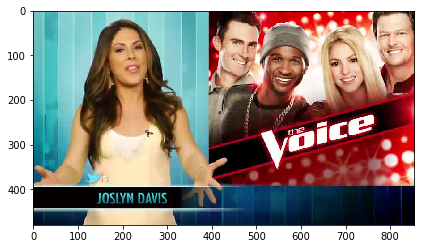

In [488]:
# clip 2
all_frame_2 = []
for i in range(65, 200):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '0' + name
    pic = cv.imread("./project1/clip_2/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_2.append(RGB_img)
img2 = all_frame_2[4]
pts = feature_comp(all_frame_2, iteration = 5)
for p in pts:
    img2  = cv.circle(img２, (int(p[0]),int(p[1])), 5, (255,0,0), -1) 
io.imshow(img2)

In [489]:
pts

[]

## Brute Force on compare feature only

In [22]:
def comp_1(all_frame, iteration=30,threshold=10, frame_to_comp = 0):
    sift = cv.xfeatures2d.SIFT_create()
    bf = cv.BFMatcher()
    result = []
    flag = 0
    a =  all_frame[frame_to_comp]
    kp_1, des_1 = sift.detectAndCompute(a,None)
    while iteration > 0:
        rand = random.sample(range(len(all_frame)), 1)
        b =  all_frame[rand[0]]
        # find the keypoints and descriptors with SIFT
        kp_2, des_2 = sift.detectAndCompute(b,None)
        matches = bf.knnMatch(des_1,des_2, k=2)

        # Apply ratio test
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append(m)
        # find matching points that in same or close place
        for match in good:
            match_1 = kp_1[match.queryIdx]
            result.append((int(match_1.pt[0]),int(match_1.pt[1])))
        iteration -= 1
    high_occur = []
    for pt in result:
        if result.count(pt) > 20:
            high_occur.append(pt)
    if len(high_occur) > 0:
            high_occur = np.unique(np.array(high_occur), axis=0)
    return high_occur 

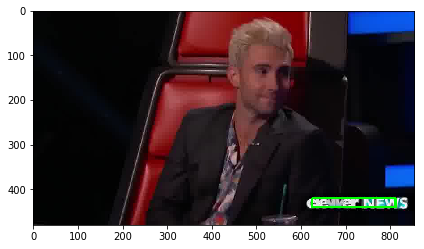

In [19]:
# clip 2
all_frame_2 = []
for i in range(65, 200):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '0' + name
    pic = cv.imread("./project1/clip_2/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_2.append(RGB_img)
img2 = all_frame_2[100]
# pts = feature_comp_bf(all_frame_2)
pts = comp_1(all_frame_2, iteration=30,threshold=10, frame_to_comp = 100)
x_max, x_min = pts[:,0].max(), pts[:,0].min()
y_max, y_min = pts[:,1].max(), pts[:,1].min()

img2  = cv.rectangle(img2, (x_min,y_min),(x_max,y_max),(0,255,0),3)
# for p in pts:
#     img2  = cv.circle(img２, (int(p[0]),int(p[1])), 5, (255,0,0), -1) 
io.imshow(img2)

In [23]:
# clip 3
all_frame_3 = []
for i in range(16, 291):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '00' + name
    if len(name) == 7:
        name = '0' + name
    pic = cv.imread("./project1/clip_3/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_3.append(RGB_img)
img3 = all_frame_3[2]
# pts = feature_comp_bf(all_frame_2)
pts = comp_1(all_frame_3, iteration=10,threshold=30, frame_to_comp = 2)
print(pts) # cannot find such feature points
x_max, x_min = pts[:,0].max(), pts[:,0].min()
y_max, y_min = pts[:,1].max(), pts[:,1].min()

img3  = cv.rectangle(img3, (x_min,y_min),(x_max,y_max),(0,255,0),3)
# for p in pts:
#     img2  = cv.circle(img２, (int(p[0]),int(p[1])), 5, (255,0,0), -1) 
io.imshow(img3)

[]


TypeError: list indices must be integers or slices, not tuple